# Project review for Gearshifting tool
Navigate it using the "contents tab", at the left:

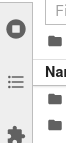

# Conclusions
(more detailed analysis & sugestions in cells below):
* Console-UI tool
* Relies on Excel&trade; as a UI for versatile input/outputs (i.e. supporting multiple cases at once).
* Relies on `schedula` to execute flexibly with missing data (partial outputs require python programming, not from cmdline).
* Documented with python's sphinx, with schedula diagrams (TODO: add missing API & dispatchers, publish in own site).
* Package structure and dependencies need a bit of trimming.
  * Classifiers claim it runs in python3.5, but docs writes 3.6+ (Q: is it tested in those versions?).
  * I tested it under python3.8 and it seems ok, no? (TODO: add python3.8 in `setup.py:classifiers` and documentation)* QA needs some work (no TCs & assertions).
  * Q: why is numpy==1.19.3 pinned?
* Very good readability of the code.

## 0.Installation
This notebook requires also these packages (install them before launching jupyter):

    pip install 'jupyterlab>=3' radon findimports

Install project (`dev` needed to view files & generate docs):

    install them before launching jupyterpip install -e .[dev]

Test it:

In [45]:
!gearshift --help

Usage: gearshift [OPTIONS] COMMAND [ARGS]...

  GEARSHIFT command line tool.

Options:
  -v, --verbosity LVL  Either CRITICAL, ERROR, WARNING, INFO or DEBUG
  -h, --help           Show this message and exit.

Commands:
  demo  Generates sample demo files.
  run   Run GEARSHIFT tool.


In [1]:
## This notebook needs as CWD the project's root dir.
#
import gearshift
from pathlib import Path
import os

proj_root = Path(gearshift.__file__).parent.parent
if not proj_root.samefile(Path.cwd()):
    print(f"CHDIR: {Path.cwd()} --> {proj_root}")
    os.chdir(proj_root)

CHDIR: /home/ankostis/Work/gearshift_calculation_tool.git/doc --> /home/ankostis/Work/gearshift_calculation_tool.git


In [84]:
!grep -i python setup.py

            "Programming Language :: Python",
            "Programming Language :: Python :: 3",
            "Programming Language :: Python :: 3.6",
            "Programming Language :: Python :: 3.7",
            "Programming Language :: Python :: Implementation :: CPython",
        python_requires='>=3.5',


In [22]:
%%writefile radon.cfg
[radon]
# Empty module
exclude = gearshift/core/model/__init__.py

Overwriting radon.cfg


## 1.Sources & package structure

* No TestCases or assertions :-(
* The following packages with a single module `__init__.py` could be transformed to same-named modules: 
  * `gearshift/cli/__init__.py`
  * `gearshift/core/model/calculateShiftpointsNdvFullPC/corrections/__init__.py`
* The `doc/_build` folder should be ignored from git
  (i guess it was there to facilitate review, correct?) 

In [4]:
!ls -l

total 76
-rw-r--r-- 1 ankostis ankostis   493 Jan 14 13:40 AUTHORS.rst
-rw-r--r-- 1 ankostis ankostis 19517 Jan 19 11:39 Gearshift-CodeReview.ipynb
-rw-r--r-- 1 ankostis ankostis  2792 Jan 19 11:39 Gearshift-CodeReview.py
drwxr-xr-x 7 ankostis ankostis  4096 Jan 18 14:09 Hercules.venv
-rw-r--r-- 1 ankostis ankostis 13141 Jan 14 13:40 LICENSE
-rw-r--r-- 1 ankostis ankostis  5669 Jan 14 13:40 README.rst
drwxr-xr-x 4 ankostis ankostis  4096 Jan 14 13:40 doc
drwxr-xr-x 5 ankostis ankostis  4096 Jan 14 13:40 gearshift
-rw-r--r-- 1 ankostis ankostis    66 Jan 18 14:52 radon.cfg
-rw-r--r-- 1 ankostis ankostis   167 Jan 14 13:40 setup.cfg
-rw-r--r-- 1 ankostis ankostis  3773 Jan 14 13:40 setup.py


In [23]:
!find gearshift -name '*.py'

gearshift/core/load/excel.py
gearshift/core/load/__init__.py
gearshift/core/model/scaleTrace/__init__.py
gearshift/core/model/calculateShiftpointsNdvFullPC/corrections/__init__.py
gearshift/core/model/calculateShiftpointsNdvFullPC/__init__.py
gearshift/core/model/__init__.py
gearshift/core/__init__.py
gearshift/core/write/excel.py
gearshift/core/write/__init__.py
gearshift/cli/__init__.py
gearshift/__init__.py


In [24]:
!grep -R assert gearshift/

In [25]:
!find doc/_build | head 

doc/_build
doc/_build/html
doc/_build/html/model.html
doc/_build/html/search.html
doc/_build/html/modules.html
doc/_build/html/gearshift.core.model.scaleTrace.html
doc/_build/html/genindex.html
doc/_build/html/installation.html
doc/_build/html/_images
doc/_build/html/_images/correction_4b_4.PNG
find: 'standard output': Broken pipe
find: write error


In [14]:
!findimports gearshift -u

gearshift/core/__init__.py:24: osp not used
gearshift/core/__init__.py:26: _model not used
gearshift/core/model/calculateShiftpointsNdvFullPC/corrections/__init__.py:22: logging not used


In [26]:
!findimports gearshift | grep -Ev 'logging|\bos\b'  # view important imports only

gearshift.__init__:
  datetime
  gearshift.core
  glob
  pkg_resources
  schedula
  shutil
  tqdm
gearshift.cli.__init__:
  click
  click_log
  gearshift
  schedula
gearshift.core.__init__:
  gearshift.core.load
  gearshift.core.model
  gearshift.core.write
  schedula
  tqdm
gearshift.core.load.__init__:
  gearshift.core.load.excel
  io
  pandas
  schedula
gearshift.core.load.excel:
  pandas
gearshift.core.model.__init__:
  gearshift.core.model.calculateShiftpointsNdvFullPC
  gearshift.core.model.scaleTrace
  schedula
gearshift.core.model.calculateShiftpointsNdvFullPC.__init__:
  corrections
  functools
  numpy
  regex
  schedula
  scipy.interpolate
gearshift.core.model.calculateShiftpointsNdvFullPC.corrections.__init__:
  functools
  numpy
  regex
gearshift.core.model.scaleTrace.__init__:
  numpy
  schedula
  scipy.interpolate
gearshift.core.write.__init__:
  gearshift.core.write.excel
  schedula
gearshift.core.write.excel:
  numpy
  pandas
  re


In [15]:
!findimports gearshift -d > /tmp/gearshift-imports.dot

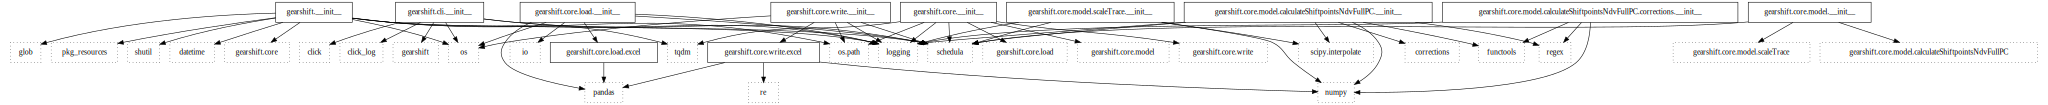

In [6]:
from graphviz import Source

Source.from_file("/tmp/gearshift-imports.dot")

## 2.Documentation
* `sphinx_rtd_theme` is not needed (included by default since ~6 years now)
* `/doc/modules.rst: WARNING: document isn't included in any toctree`
* Contents in file:///home/ankostis/Work/gearshift_calculation_too.git/doc/_build/html/model.html#project-files-and-folders
* API & dispatcher models missing (e.g. `save_demo` function & model).
* "Usage" chapter is missing a rouch-description of the input-file (e.g. a screenshot & a mention of the sub-sheets):

  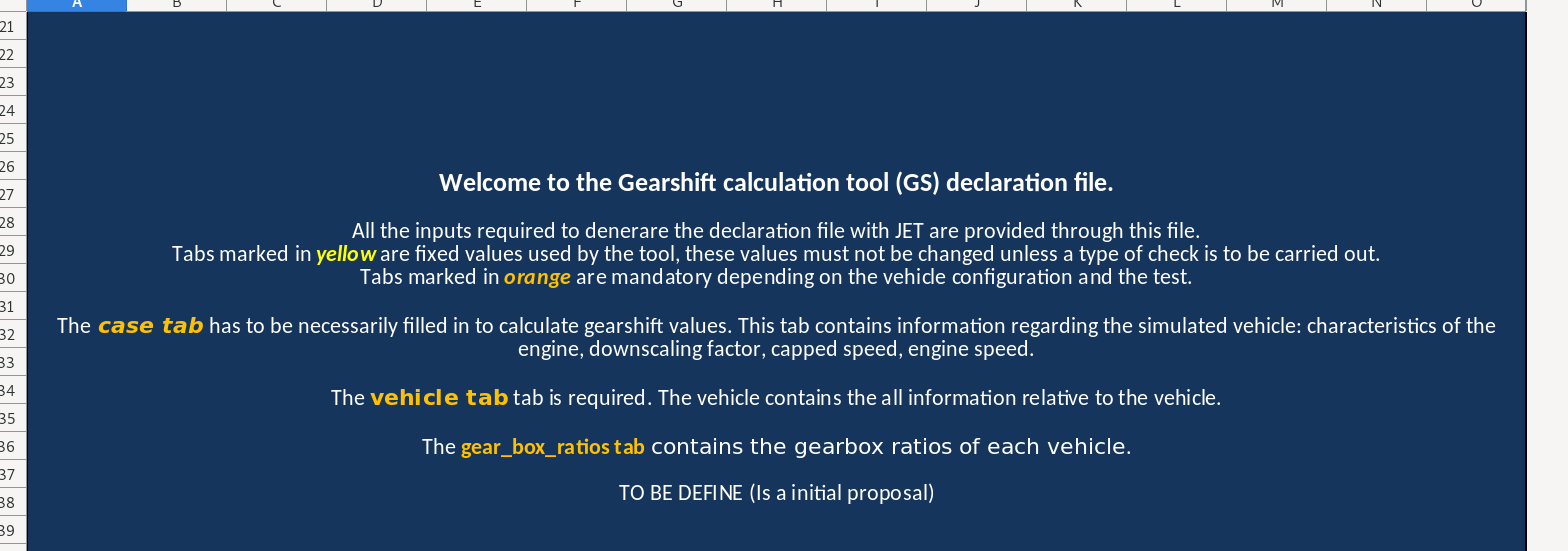

* I would re-odrer "Model" chapter after "Usage";  and if "Usage" is augmented with Inputs, i would move its current content in a new "Quick-start" sub-section under the "Introduction". 

In [37]:
!rm -rf doc/_buil/* && python setup.py build_sphinx

running build_sphinx
Running Sphinx v3.4.3
making output directory... done
loading intersphinx inventory from https://docs.python.org/objects.inv...
intersphinx inventory has moved: https://docs.python.org/objects.inv -> https://docs.python.org/3/objects.inv
building [mo]: all of 0 po files
building [html]: all source files
updating environment: [new config] 16 added, 0 changed, 0 removed
reading sources... [100%] usage                                                 9;49;00m
/home/ankostis/Work/gearshift_calculation_tool.git/gearshift/__init__.py:docstring of gearshift.rst:5: WARNING: autosummary: stub file not found 'gearshift.core'. Check your autosummary_generate setting.
/home/ankostis/Work/gearshift_calculation_tool.git/gearshift/__init__.py:docstring of gearshift.rst:5: WARNING: autosummary: stub file not found 'gearshift.cli'. Check your autosummary_generate setting.
/home/ankostis/Work/gearshift_calculation_tool.git/gearshift/__init__.py:docstring of gearshift:1: WARNING: dupl

In [75]:
!ls doc/_build/html/

_images
_modules
_sources
_static
api.html
gearshift.cli.html
gearshift.core.html
gearshift.core.load.html
gearshift.core.model.calculateShiftpointsNdvFullPC.corrections.html
gearshift.core.model.calculateShiftpointsNdvFullPC.html
gearshift.core.model.html
gearshift.core.model.scaleTrace.html
gearshift.core.write.html
gearshift.html
genindex.html
index.html
installation.html
intro.html
model.html
modules.html
objects.inv
py-modindex.html
search.html
searchindex.js
usage.html


In [77]:
!ls doc/_build/html/{_modules,_sources}/

doc/_build/html/_modules/:
gearshift  gearshift.html  index.html

doc/_build/html/_sources/:
api.rst.txt
gearshift.cli.rst.txt
gearshift.core.load.rst.txt
gearshift.core.model.calculateShiftpointsNdvFullPC.corrections.rst.txt
gearshift.core.model.calculateShiftpointsNdvFullPC.rst.txt
gearshift.core.model.rst.txt
gearshift.core.model.scaleTrace.rst.txt
gearshift.core.rst.txt
gearshift.core.write.rst.txt
gearshift.rst.txt
index.rst.txt
installation.rst.txt
intro.rst.txt
model.rst.txt
modules.rst.txt
usage.rst.txt


## 3.Code metrics
* All well;  the x2 functions that are too-complex, are well-written (structure & readability).

### 3.1.Maintainability metric
* All well

In [12]:
!radon mi -s gearshift/

gearshift/__init__.py - A (68.87)
gearshift/core/__init__.py - A (64.35)
gearshift/core/load/excel.py - A (90.85)
gearshift/core/load/__init__.py - A (78.40)
gearshift/core/model/scaleTrace/__init__.py - A (51.36)
gearshift/core/model/calculateShiftpointsNdvFullPC/__init__.py - A (25.46)
gearshift/core/model/calculateShiftpointsNdvFullPC/corrections/__init__.py - A (19.39)
gearshift/core/write/excel.py - A (72.39)
gearshift/core/write/__init__.py - A (65.05)
gearshift/cli/__init__.py - A (80.93)


### 3.2.Cyclomatic Complexity metric
* Not unexpectedly `gearshift/core/model/calculateShiftpointsNdvFullPC/corrections/__init__.py:applyCorrection4f()` is highly complex (110).

In [41]:
!radon cc -s --show-closures --total-average   gearshift/

gearshift/__init__.py
    F 43:0 _yield_files - B (8)
    C 79:0 _ProgressBar - A (3)
    F 168:0 save_demo_files - A (3)
    F 115:0 run_core - A (3)
    M 90:4 _ProgressBar.format_meter - A (2)
    M 80:4 _ProgressBar.__init__ - A (2)
    M 86:4 _ProgressBar._format_meter - A (1)
    F 202:0 log_done - A (1)
    F 188:0 default_start_time - A (1)
    F 163:0 check_demo_flag - A (1)
    F 99:0 default_timestamp - A (1)
    F 66:0 register_core - A (1)
    F 28:0 init_conf - A (1)
gearshift/core/__init__.py
    F 52:0 _obtain_inputs - C (13)
    F 179:0 run_model - A (4)
    F 39:0 register_model - A (1)
gearshift/core/load/excel.py
    F 14:0 _read_columns - A (4)
    F 88:0 parse_excel_file - A (2)
    F 23:0 _read_dataframe - A (2)
gearshift/core/load/__init__.py
    F 82:0 _load_speed_phase_data - A (2)
    F 119:0 _validation - A (1)
    F 102:0 merge_data - A (1)
    F 54:0 check_file_format - A (1)
    F 37:0 open_input_file - A (1)
gearshift/core/model/scaleTrace/__init__.py
  

In [40]:
!cat gearshift/___init__.py

cat: gearshift/___init__.py: No such file or directory


### 3.3.Halstead complexity metdic
(included in Maintainability index)

Expectedely, gear-corrections are the most difficult bc they are non-vetorials. but loops.

#### 3.3.1.Explanation:
* $n_1$ = the number of distinct operators
* $n_2$ = the number of distinct operands
* $N_1$ = the total number of operators
* $N_2$ = the total number of operands

From these numbers, several measures can be calculated:

* Program vocabulary: $n = n_1 + n_2$
* Program length: $N = N_1 + N_2$
* Calculated estimated program length: $\hat{N} = n_1 \ln{n_1} + n_2 \ln{n_2}$
* Volume: $V = N × \ln{n}$
* Difficulty : $D = \frac{n_1}{2} × \frac{N_2}{n_2}$
* Effort: $E = D × V$
* Time required to program: $T=\frac{E}{18} seconds$
* Number of delivered bugs: $B=\frac{V}{3000}$



In [42]:
## Print Halstead metrics only for "difficult" functions.
#  (instead of `!radon hal -f gearshift` for all)
#
from radon.complexity import SCORE
from radon.cli import Config
from radon.cli import HCHarvester

def dump_halstead(*paths, min_attr="difficulty", min_val=6):
    cfg = Config(exclude=(),
            ignore=(),
            by_function=True,
            order=SCORE,
            no_assert=False,
            show_closures=False,
            min='A',
            max='F',
                )
    h = HCHarvester(paths, cfg)

    for file, tfile in h.results:
        for fun, tfun in tfile.functions:
            if getattr(tfun, min_attr) > min_val:
                print(f"{file}:{fun}()")
                for key in tfun._fields:
                    print(f"    {key:22}:{getattr(tfun, key)}")

dump_halstead("gearshift/")

gearshift/core/model/scaleTrace/__init__.py:_algorithm_wltp()
    h1                    :8
    h2                    :32
    N1                    :25
    N2                    :49
    vocabulary            :40
    length                :74
    calculated_length     :184.0
    volume                :393.82267902166484
    difficulty            :6.125
    effort                :2412.163909007697
    time                  :134.00910605598315
    bugs                  :0.13127422634055494
gearshift/core/model/scaleTrace/__init__.py:compensate_trace()
    h1                    :8
    h2                    :20
    N1                    :18
    N2                    :35
    vocabulary            :28
    length                :53
    calculated_length     :110.43856189774725
    volume                :254.78981086905299
    difficulty            :7.0
    effort                :1783.528676083371
    time                  :99.08492644907616
    bugs                  :0.084929936956351
gearshift

## 4.Code inspection
* Complex functions identified have very good readability.

In [3]:
from gearshift.core.model import calculateShiftpointsNdvFullPC

calculateShiftpointsNdvFullPC.determine_initial_gears??

Signature:
calculateShiftpointsNdvFullPC.determine_initial_gears(
    InStandStill,
    NoOfGearsFinal,
    PossibleGearsByEngineSpeed,
    PossibleGearsByAvailablePowersWithTotalSafetyMargin,
    AccelerationFromStandstillStarts,
    PhaseEnds,
    PhaseValues,
    PHASE_ACCELERATION_FROM_STANDSTILL,
    InitialRequiredEngineSpeeds,
    MinDrive1stTo2nd,
)
Source:   
@sh.add_function(dsp, outputs=["InitialGears", "PossibleGears"])
def determine_initial_gears(
    InStandStill,
    NoOfGearsFinal,
    PossibleGearsByEngineSpeed,
    PossibleGearsByAvailablePowersWithTotalSafetyMargin,
    AccelerationFromStandstillStarts,
    PhaseEnds,
    PhaseValues,
    PHASE_ACCELERATION_FROM_STANDSTILL,
    InitialRequiredEngineSpeeds,
    MinDrive1stTo2nd,
):
    """
    Determine initial gears

    :param InStandStill:
        Contains the points that are in standstill phase as a True
    :type InStandStill: boolean array

    :param NoOfGearsFinal:
        The number of forward gears after app

In [43]:
from gearshift.core.model.calculateShiftpointsNdvFullPC import corrections

corrections.applyCorrection4f??

Signature:
corrections.applyCorrection4f(
    InitialGears,
    ClutchDisengaged,
    SuppressGear0DuringDownshifts,
    PossibleGears,
    InStandStill,
    InDecelerationToStandstill,
    InDeceleration,
)
Source:   
def applyCorrection4f(
    InitialGears,
    ClutchDisengaged,
    SuppressGear0DuringDownshifts,
    PossibleGears,
    InStandStill,
    InDecelerationToStandstill,
    InDeceleration,
):
    """
    Sub-Annex 2 in section 4.(f)

    If during a deceleration phase the duration of a gear sequence between
    two gear sequences of 3 seconds or more is only 1 second, it shall be
    replaced by gear 0 and the clutch shall be disengaged.

    :param InitialGears:
        A cell array of gear numbers AFTER the previous correction
    :type InitialGears: numpy.array

    :param ClutchDisengaged:
        The clutch disengaged by each second.
    :type ClutchDisengaged: boolean numpy.array

    :param SuppressGear0DuringDownshifts:
        Sub-Annex 2 (4f).If a gear is used fo

## 5.Usability
* Missing `--version` option (important for when when bugfixes have been applied).
* Typically `-v` should accept no-level (and enable DEBUG) or verbosity-levels also numerically (pass argument through `logging.getLevelName()`)
  * Actually not any logs produced.
* `demo` cmd leaves a temporary file `~$gs_input_demo.xlsx`.

In [65]:
!!gearshift --version

['Usage: gearshift [OPTIONS] COMMAND [ARGS]...',
 "Try 'gearshift -h' for help.",
 '',
 'Error: no such option: --version']

In [64]:
!gearshift -v 0 demo

Usage: gearshift [OPTIONS] COMMAND [ARGS]...

Error: Invalid value for '--verbosity' / '-v': Must be CRITICAL, ERROR, WARNING, INFO or DEBUG, not {}


In [94]:
!gearshift -v demo

Usage: gearshift [OPTIONS] COMMAND [ARGS]...

Error: Invalid value for '--verbosity' / '-v': Must be CRITICAL, ERROR, WARNING, INFO or DEBUG, not {}


In [72]:
!gearshift -v DEBUG demo

2021-01-27 10:03:59,498: INFO:gearshift:CO2MPAS demos written into (./inputs).
2021-01-27 10:03:59,498: INFO:gearshift: Done! [0.30 sec]


In [73]:
ls ./inputs

 gs_input_demo.xlsx  '~$gs_input_demo.xlsx'


In [88]:
!gearshift run --help

Usage: gearshift run [OPTIONS] [INPUT_FILES]...

  Run GEARSHIFT for all files into INPUT_FILES.

  INPUT_FILES: List of input files and/or folders              (format:
  .xlsx).

Options:
  -O, --output-folder DIRECTORY   Output folder.  [default: ./outputs]
  -OT, --output-template PATH     Template output.
  -PL, --plot-workflow            Open workflow-plot in browser, after run
                                  finished.

  -OF, --output-format DIRECTORY  Output format.  [default: xlsx]
  -h, --help                      Show this message and exit.


In [89]:
!gearshift -v DEBUG DEBUG run ./inputs

  0%|                                                     | 0/1 [00:00<?, ?it/s]: Processing /home/ankostis/Work/gearshift_calculation_tool.git/inputs/gs_input_demo.xlsx

100%|████████████████████████████████████████████| 1/1 [03:35<00:00, 215.34s/it]                                                                                          
2021-01-27 10:33:10,713: INFO:gearshift: Done! [215.63 sec]


### 5.1.Input file
* Q: in the excel help-text, did you copy the descriptions from Matlab?  If so, some are not valid (i.e. you have to dig into the code to see what if a column works/is deprecated).